In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from scipy import stats
from statistics import mean 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("mpg.csv",na_values="?")
df.head()

,mpg,cylinder,displacement,horsepower,weight,acceleration,modelyear,origin,carname
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [3]:
df.tail()

,mpg,cylinder,displacement,horsepower,weight,acceleration,modelyear,origin,carname
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,1,chevy s-10


In [4]:
df.shape

(398, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinder        398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null int64
acceleration    398 non-null float64
modelyear       398 non-null int64
origin          398 non-null int64
carname         398 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [6]:
df['horsepower'] = df['horsepower'].fillna(df["horsepower"].mean())

In [7]:
df.describe()

,mpg,cylinder,displacement,horsepower,weight,acceleration,modelyear,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [8]:
df.isna().sum()

mpg             0
cylinder        0
displacement    0
horsepower      0
weight          0
acceleration    0
modelyear       0
origin          0
carname         0
dtype: int64

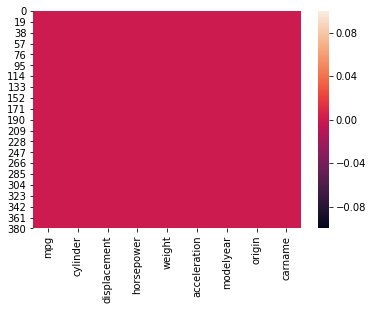

In [9]:
sns.heatmap(df.isna())

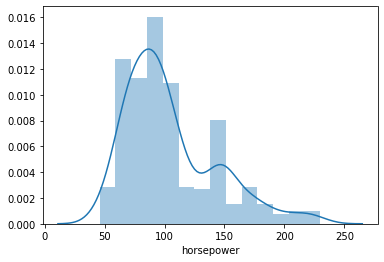

In [10]:
sns.distplot(df["horsepower"])

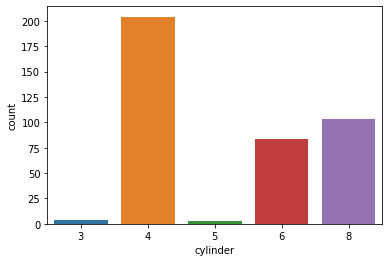

In [11]:
sns.countplot(df['cylinder'])

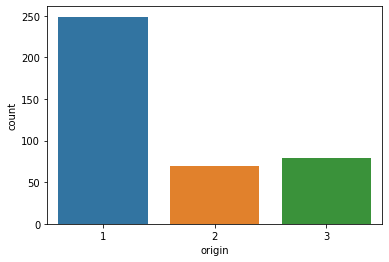

In [12]:
sns.countplot(df['origin'])

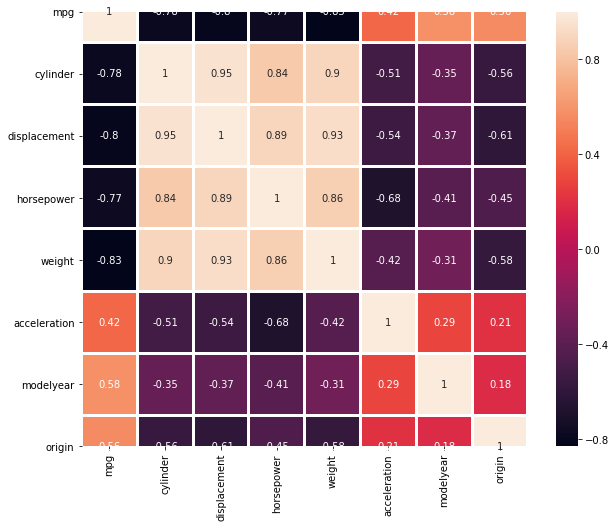

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot = True, linewidths=2)

cylinder,displacement,horsepower,weight have +ve correlation

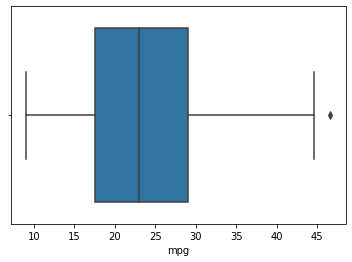

In [14]:
sns.boxplot(x='mpg',data=df)

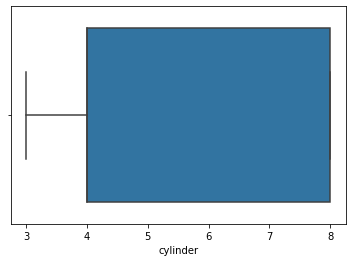

In [15]:
sns.boxplot(x='cylinder',data=df)

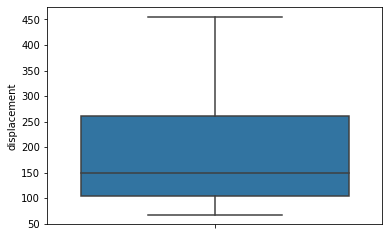

In [16]:
sns.boxplot(y='displacement',data=df)

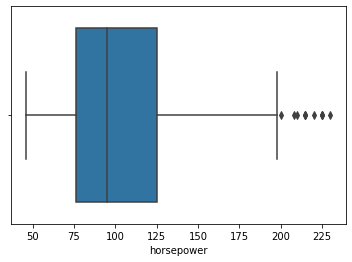

In [17]:
sns.boxplot(x='horsepower',data=df)

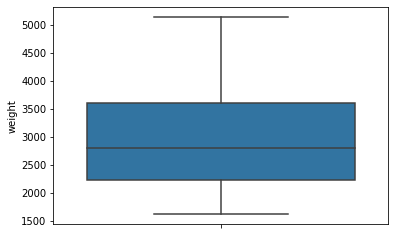

In [18]:
sns.boxplot(y='weight',data=df)

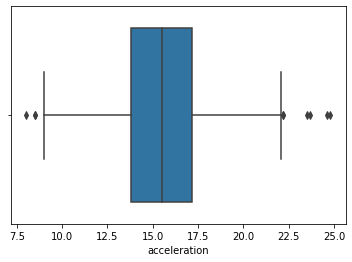

In [19]:
sns.boxplot(x='acceleration',data=df)

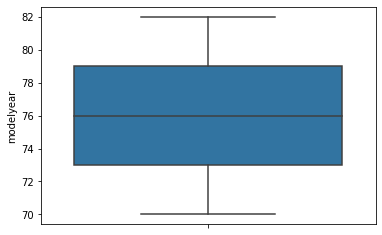

In [20]:
sns.boxplot(y='modelyear',data=df)

there is outlier in acceleration,horsepower

Removing outliers

In [21]:
min_thresold,max_thresold=df.acceleration.quantile([0.001,0.999])
min_thresold,max_thresold

(8.1985, 24.720600000000015)

In [22]:
df=df[(df.acceleration<max_thresold) & (df.acceleration>min_thresold)]
df.shape

(396, 9)

In [23]:
min_thresold,max_thresold=df.horsepower.quantile([0.001,0.999])
print(min_thresold)
print(max_thresold)

df=df[(df.horsepower<max_thresold) & (df.horsepower>min_thresold)]
print(df.shape)

46.0
228.0250000000001
(393, 9)


In [24]:
df.skew()

mpg             0.457335
cylinder        0.527946
displacement    0.721978
horsepower      1.092175
weight          0.540668
acceleration    0.274188
modelyear       0.004103
origin          0.926519
dtype: float64

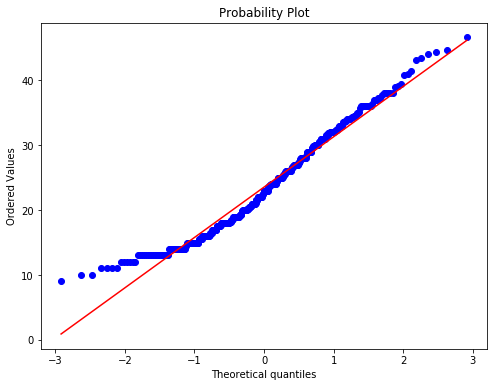

In [25]:
plt.figure(figsize=(8,6))
stats.probplot(df["mpg"],plot=plt)
plt.show()

In [26]:
df.drop(['carname'],axis=1 , inplace=True)

In [27]:
df["cylinder"]=df["cylinder"].astype(str)
df["origin"]=df["origin"].astype(str)

df=pd.get_dummies(df)
df.head()

,mpg,displacement,horsepower,weight,acceleration,modelyear,cylinder_3,cylinder_4,cylinder_5,cylinder_6,cylinder_8,origin_1,origin_2,origin_3
0,18.0,307.0,130.0,3504,12.0,70,0,0,0,0,1,1,0,0
1,15.0,350.0,165.0,3693,11.5,70,0,0,0,0,1,1,0,0
2,18.0,318.0,150.0,3436,11.0,70,0,0,0,0,1,1,0,0
3,16.0,304.0,150.0,3433,12.0,70,0,0,0,0,1,1,0,0
4,17.0,302.0,140.0,3449,10.5,70,0,0,0,0,1,1,0,0


In [28]:
X=df.drop(["mpg"],axis=1)
print(X.shape)

y=df["mpg"]
print(y.shape)

(393, 13)
(393,)


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=53)

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X= sc.fit_transform(X)

In [31]:
lr= LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
print("lr.coef_ :",lr.coef_)
print("predicted score :",pred)

lr.coef_ : [ 0.01321727 -0.03645609 -0.00545525 -0.0531108   0.70477669 -5.32517277
  2.1152125   2.8978302  -0.73945495  1.05158502 -1.48007013  0.08149982
  1.39857031]
predicted score : [21.51249636 36.26356729 14.99313202 29.02342202 29.08655118 30.25723347
 27.35220813 15.68400476 16.2061764  33.79204095 21.40060165 26.0923573
 29.78865019 13.15738117 30.34236097 12.3780497  23.35202898 16.03540459
 18.10978968 33.20592008 14.68347457 20.28103342 21.47215312 32.63552744
 29.53909371 34.16266261 34.84407274 22.37729096 33.61974191 34.90069138
 25.32316634 25.09179259 33.14004904 29.94089398 16.22602511 30.31860962
 24.01147611 26.90039674 27.3362673  18.18712207 27.551699   35.12878581
 23.95985408 15.51651653 10.25850942 20.39340953 32.1734412  20.09812327
 27.9606634  17.43020668 28.8557712  21.82767342 13.87586948 13.12183827
 23.85178039 35.7298419  20.76898183 20.48890197 32.67867935  7.55456269
 14.91123751 20.41457814 20.924387   27.08589414 25.87707687 31.65251605
 30.39182

In [32]:
df= pd.DataFrame({'Actual': y_test, 'Predicted': pred})
df_mpg= df.head(15)
df_mpg

,Actual,Predicted
280,21.5,21.512496
383,38.0,36.263567
136,16.0,14.993132
368,27.0,29.023422
340,25.8,29.086551
335,35.0,30.257233
141,29.0,27.352208
96,13.0,15.684005
163,18.0,16.206176
331,33.8,33.792041


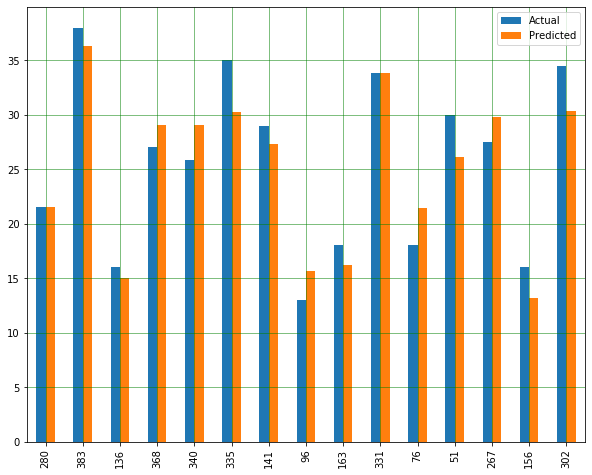

In [33]:
df_mpg.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [34]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test,pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,pred)))

Mean Absolute Error: 2.157657561819944
Mean Squared Error: 8.467883740284858
Root Mean Squared Error: 2.909962841736103


In [35]:
r2_score(y_test,pred)

0.861864457726716

In [36]:
from sklearn.model_selection import cross_val_score

cross_val_score(linear_model.LinearRegression(),X,y,cv=5,scoring='r2').mean()

0.6223223574050156

In [37]:
# Train the model 
lasso = Lasso(alpha = 1) 
lasso.fit(X_train, y_train) 
y_pred1 = lasso.predict(X_test) 
  
# Calculate Mean Squared Error 
mean_squared_error = np.mean((y_pred1 - y_test)**2) 
print("Mean squared error on test set", mean_squared_error) 
lasso_coeff = pd.DataFrame() 
lasso_coeff["Columns"] = X_train.columns 
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_) 
  
print(lasso_coeff) 

Mean squared error on test set 10.491876584096511
         Columns  Coefficient Estimate
0   displacement             -0.000000
1     horsepower             -0.005995
2         weight             -0.006422
3   acceleration             -0.000000
4      modelyear              0.658959
5     cylinder_3             -0.000000
6     cylinder_4              0.000000
7     cylinder_5              0.000000
8     cylinder_6             -0.000000
9     cylinder_8              0.000000
10      origin_1             -0.000000
11      origin_2              0.000000
12      origin_3              0.000000


In [38]:
# Train the model  
ridge = Ridge(alpha = 1) 
ridge.fit(X_train, y_train) 
y_pred = ridge.predict(X_test) 
  
# calculate mean square error 
mean_squared_error_ridge = np.mean((y_pred - y_test)**2) 
print(mean_squared_error_ridge) 
  
# get ridge coefficient and print them 
ridge_coefficient = pd.DataFrame() 
ridge_coefficient["Columns"]= X_train.columns 
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridge.coef_) 
print(ridge_coefficient) 

8.359459456636447
         Columns  Coefficient Estimate
0   displacement              0.015277
1     horsepower             -0.037235
2         weight             -0.005522
3   acceleration             -0.037409
4      modelyear              0.709639
5     cylinder_3             -4.072863
6     cylinder_4              2.095358
7     cylinder_5              2.057043
8     cylinder_6             -0.876755
9     cylinder_8              0.797217
10      origin_1             -1.479366
11      origin_2              0.167162
12      origin_3              1.312204


In [39]:
from sklearn.linear_model import ElasticNet 
  
# Train the model 
e_net = ElasticNet(alpha = 1) 
e_net.fit(X_train, y_train) 
  
# calculate the prediction and mean square error 
y_pred_elastic = e_net.predict(X_test) 
mean_squared_error = np.mean((y_pred_elastic - y_test)**2) 
print("Mean Squared Error on test set", mean_squared_error) 
  
e_net_coeff = pd.DataFrame() 
e_net_coeff["Columns"] = X_train.columns 
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_) 
e_net_coeff 

Mean Squared Error on test set 10.463978402292764


,Columns,Coefficient Estimate
0,displacement,0.000000
1,horsepower,-0.006420
2,weight,-0.006391
3,acceleration,-0.000000
4,modelyear,0.671576
5,cylinder_3,-0.000000
6,cylinder_4,0.000000
7,cylinder_5,0.000000
8,cylinder_6,-0.000000
9,cylinder_8,0.000000


Ridge Regression reduces the coefficients but does not make them 0 and thus doesn’t eliminate any independent variable completely.It can be used to measure the impact of the different independent variables.

Lasso Regression reduces the coefficients as well as makes them 0 thus effectively eliminate the corresponding independent variable completely.

Elastic Net is a combination of both of the above regularization. It contains both the L1 and L2 as its penalty term. It performs better than Ridge and Lasso Regression for most of the test cases.


In [40]:
from sklearn.externals import joblib

joblib.dump(y_pred_elastic,'mpg_joblib')

['mpg_joblib']